In [1]:
import numpy as np
import pandas as pd

from estimagic import slice_plot

# How to visualize an optimization problem

Plotting the criterion function of an optimization problem can answer important questions
- Is the function smooth?
- Is the function flat in some directions?
- Should the optimization problem be scaled?
- Is a candidate optimum a global one?

Below we show how to do a slice plot of the criterion function

## The simple sphere function

Let's look at the simple sphere function again. This time, we specify params as dictionary, but of course, any other param format would work as well. 

In [2]:
def sphere(params):
    x = np.array(list(params.values()))
    return x @ x


params = {"alpha": 0, "beta": 0, "gamma": 0, "delta": 0}
lower_bounds = {name: -5 for name in params}
upper_bounds = {name: i + 2 for i, name in enumerate(params)}

## Creating a simple slice plot

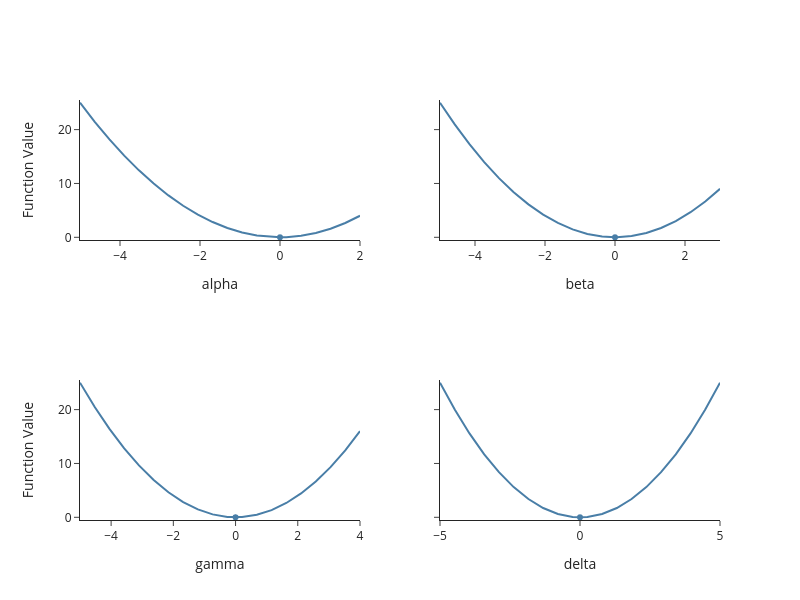

In [3]:
fig = slice_plot(
    func=sphere,
    params=params,
    lower_bounds=lower_bounds,
    upper_bounds=upper_bounds,
)
fig.show(renderer="png")

## Interpreting the plot

The plot gives us the following insights:
 
- There is no sign of local optima. 
- There is no sign of noise or non-differentiablities (careful, grid might not be fine enough).
- The problem seems to be convex.

-> We would expect almost any derivative based optimizer to work well here (which we know to be correct in that case)

## Using advanced options

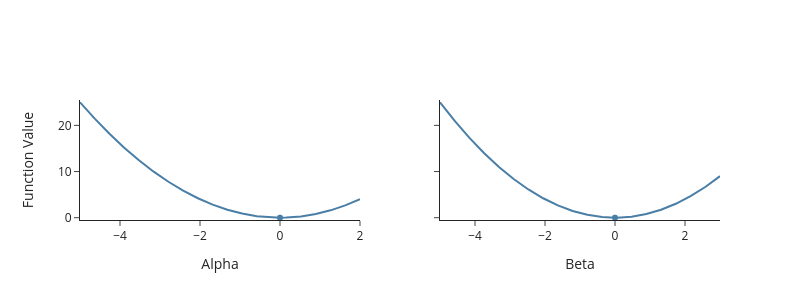

In [4]:
fig = slice_plot(
    func=sphere,
    params=params,
    lower_bounds=lower_bounds,
    upper_bounds=upper_bounds,
    # selecting a subset of params
    selector=lambda x: [x["alpha"], x["beta"]],
    # evaluate func in parallel
    n_cores=4,
    # rename the parameters
    param_names={"alpha": "Alpha", "beta": "Beta"},
)
fig.show(renderer="png")